In [1]:
import pandas as pd
df=pd.read_csv("BlackFriday.csv")

In [2]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df.drop(["Product_Category_2","Product_Category_3"],axis=1,inplace=True)

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [7]:
# All null values removed 

In [8]:
df["User_ID"].nunique()

5891

In [9]:
df["Product_ID"].nunique()

3623

In [10]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [11]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [13]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [16]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [17]:
df["Purchase"].sum()

5017668378

In [18]:
# Analysis on Gender

In [19]:
df["Gender"].value_counts()
# more males customer around 3 times female

Gender
M    405380
F    132197
Name: count, dtype: int64

In [20]:
import seaborn as sns


<Axes: xlabel='Gender', ylabel='count'>

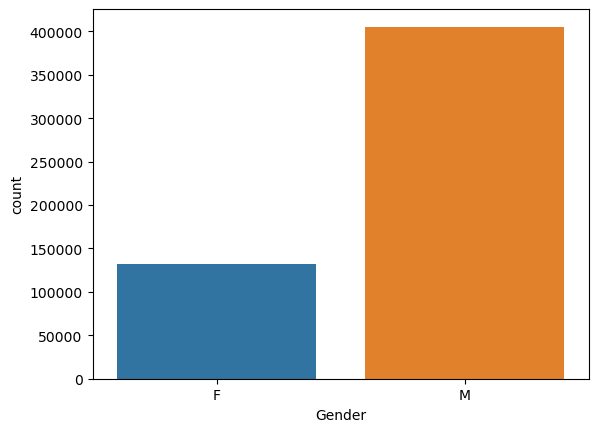

In [21]:
sns.countplot(data=df,x="Gender")

<Axes: ylabel='count'>

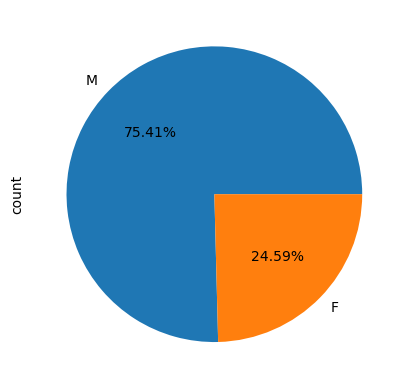

In [22]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [23]:
#Lets see how much each of them spend

In [24]:
df.groupby("Gender")["Purchase"].sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

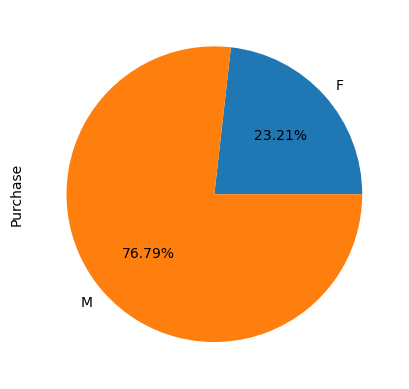

In [25]:
df.groupby("Gender")["Purchase"].sum().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='Gender'>

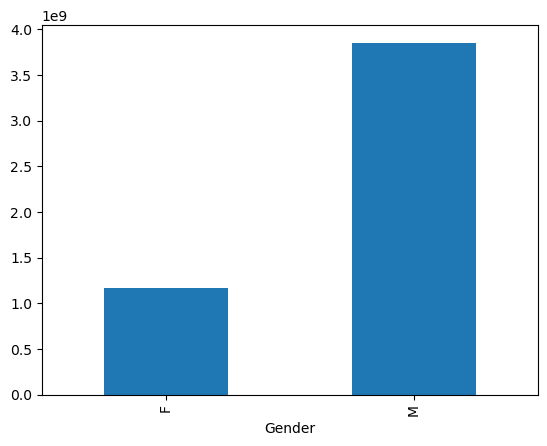

In [26]:
df.groupby("Gender")["Purchase"].sum().plot(kind="bar")

In [27]:
# males purchased total amout is 3x females

In [28]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

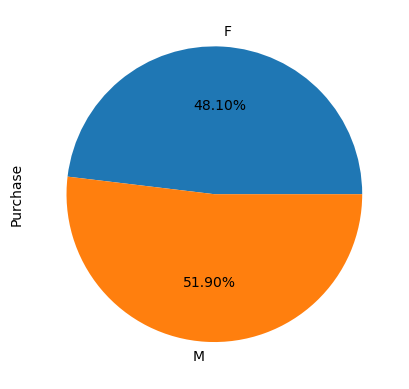

In [29]:
df.groupby("Gender")["Purchase"].mean().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='Gender'>

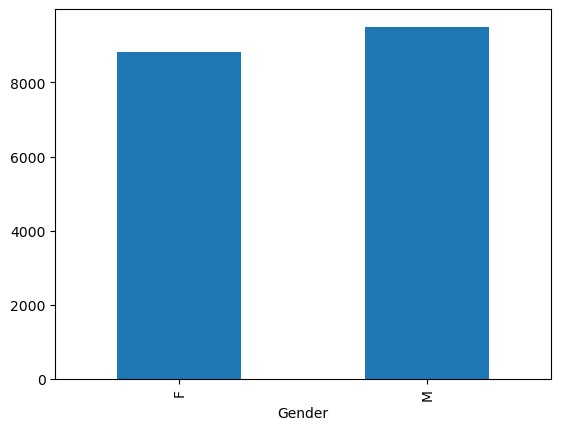

In [30]:
df.groupby("Gender")["Purchase"].mean().plot(kind="bar")

In [31]:
#both purchase spend same amount on purchase at a time

In [32]:
# Now we look into age

In [33]:
df["Age"].value_counts()

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

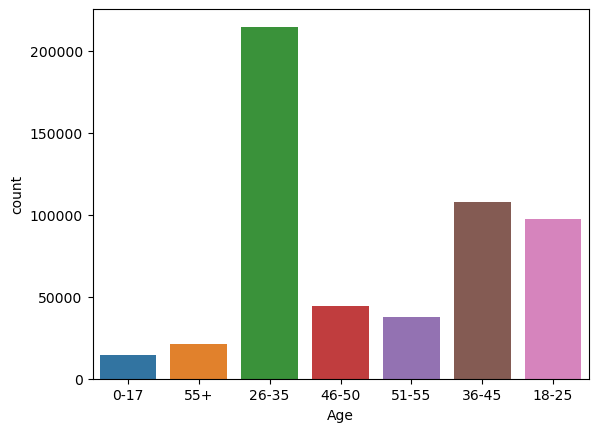

In [34]:
sns.countplot(data=df,x="Age")

<Axes: ylabel='count'>

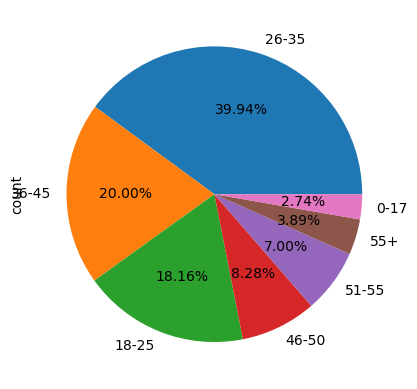

In [35]:
df["Age"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [36]:
# clearly most of target audience lies between age 26-35 then 36-45 and 18-25
# 80% of customers lies in this age group 18-45

In [37]:
# Lets see how wide range each age group purchase

In [38]:
df.groupby("Age")["Product_ID"].nunique()

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

<Axes: ylabel='Product_ID'>

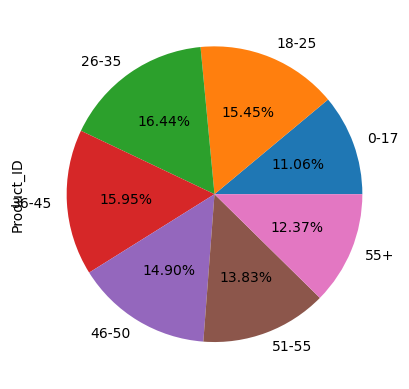

In [39]:
df.groupby("Age")["Product_ID"].nunique().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='Age'>

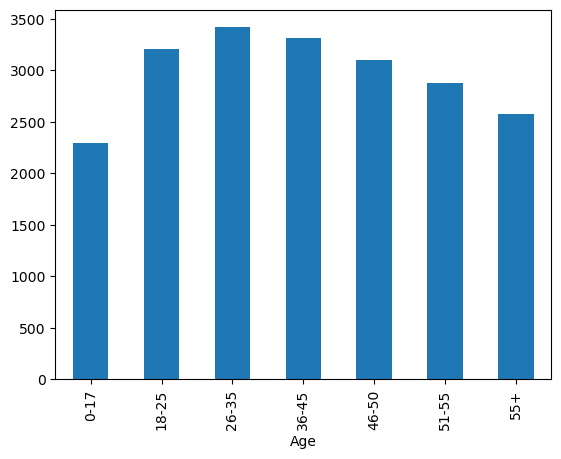

In [40]:
df.groupby("Age")["Product_ID"].nunique().plot(kind="bar")

In [41]:
# 0-17 as expected is little choosy and 55+ also else other all by wide range almost same 

In [42]:
df.groupby("Age")["Purchase"].sum()

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

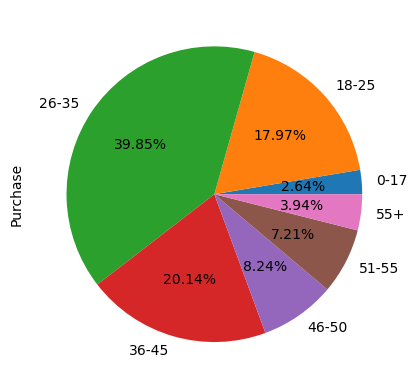

In [43]:
df.groupby("Age")["Purchase"].sum().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='Age'>

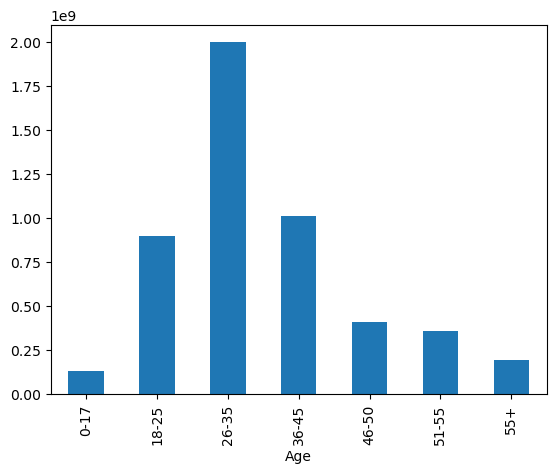

In [44]:
df.groupby("Age")["Purchase"].sum().plot(kind="bar")

In [45]:
# 26-35 years age group buy most 

In [46]:
df.groupby("Age")["Purchase"].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

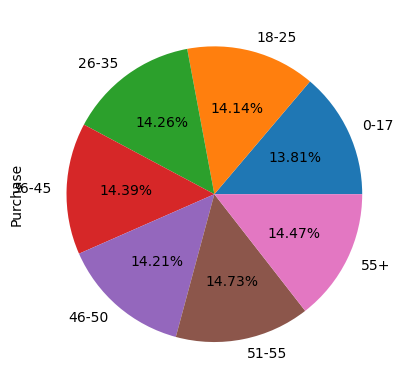

In [47]:
df.groupby("Age")["Purchase"].mean().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='Age'>

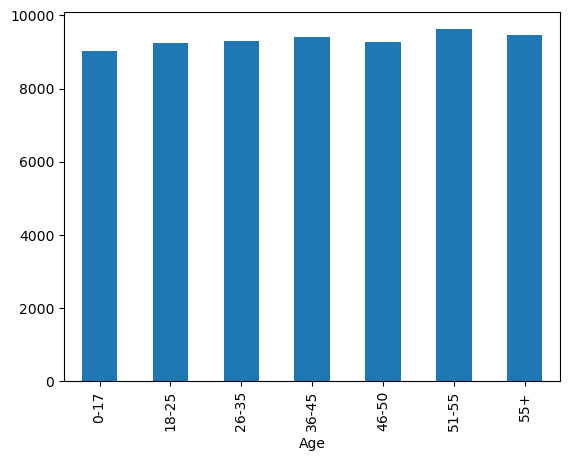

In [48]:
df.groupby("Age")["Purchase"].mean().plot(kind="bar")

In [49]:
# almost all age group have same purchasing power

In [50]:
df["Marital_Status"].value_counts()

Marital_Status
0    317817
1    219760
Name: count, dtype: int64

<Axes: ylabel='count'>

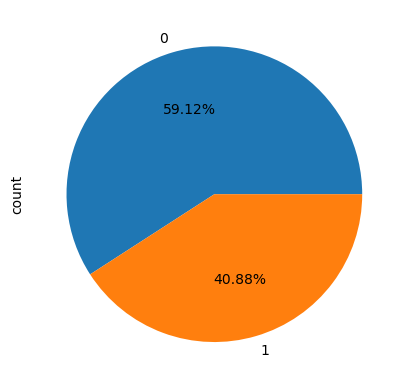

In [51]:
df["Marital_Status"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [52]:
# around 41% of buyers are married and rest 59% single

In [53]:
# multivariabe analysis

<Axes: xlabel='Age', ylabel='count'>

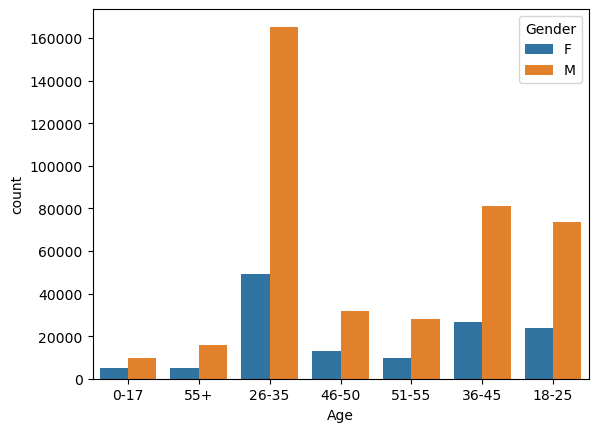

In [54]:
sns.countplot(data=df,x="Age",hue="Gender")

<Axes: xlabel='Gender', ylabel='count'>

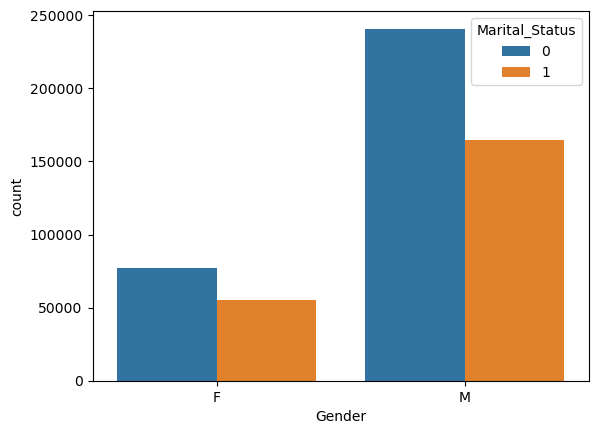

In [55]:
sns.countplot(data=df,x="Gender",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='count'>

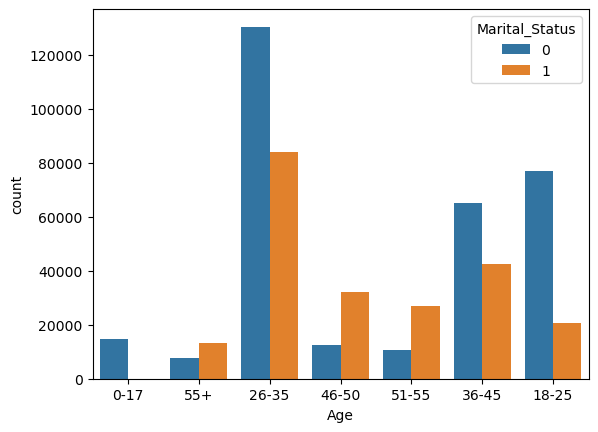

In [56]:
sns.countplot(data=df,x="Age",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='count'>

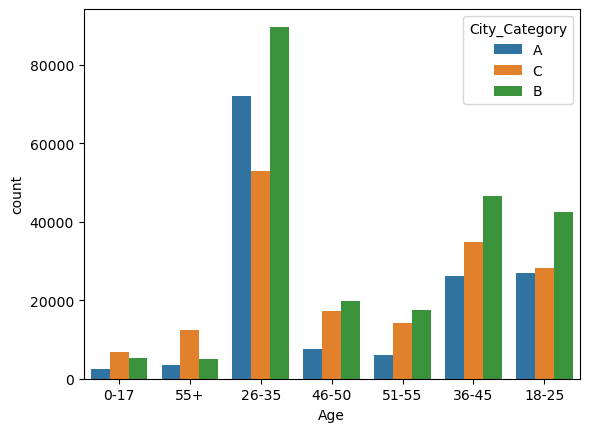

In [57]:
sns.countplot(data=df,x="Age",hue="City_Category")

<Axes: xlabel='City_Category', ylabel='count'>

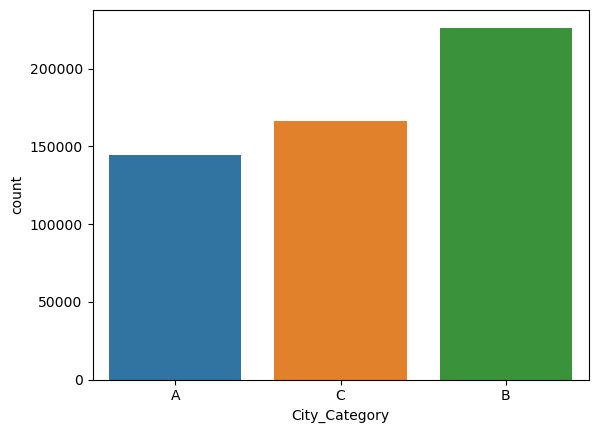

In [58]:
sns.countplot(data=df,x="City_Category")

In [59]:
df["City_Category"].value_counts()

City_Category
B    226493
C    166446
A    144638
Name: count, dtype: int64

<Axes: ylabel='count'>

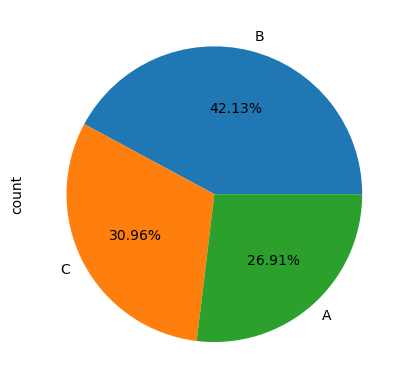

In [60]:
df["City_Category"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [61]:
# most of customers from city B followed by C 

<Axes: xlabel='City_Category', ylabel='count'>

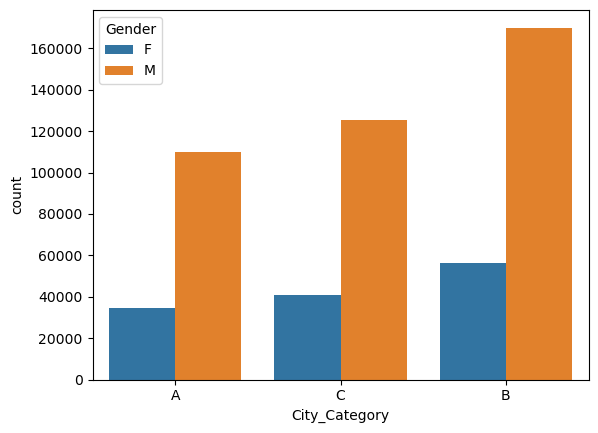

In [62]:
sns.countplot(data=df,x="City_Category",hue="Gender")

<Axes: xlabel='City_Category', ylabel='count'>

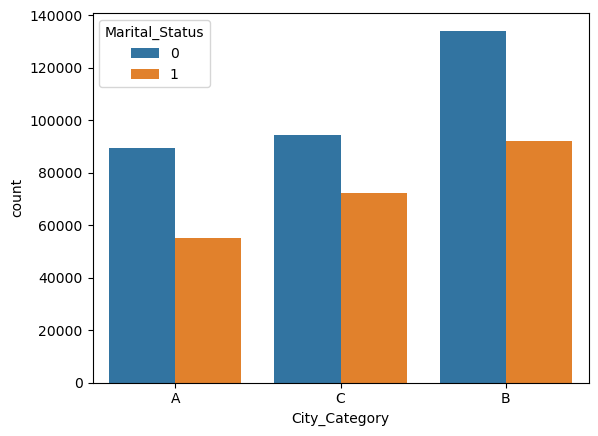

In [63]:
sns.countplot(data=df,x="City_Category",hue="Marital_Status")

In [64]:
df.groupby("City_Category")["Purchase"].sum()

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

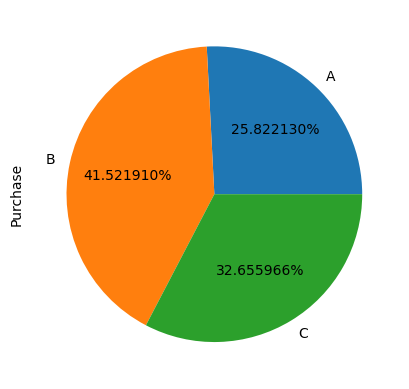

In [65]:
df.groupby("City_Category")["Purchase"].sum().plot(kind="pie",autopct="%2f%%")

In [66]:
#City B contributes most to purchase amount

<Axes: ylabel='Purchase'>

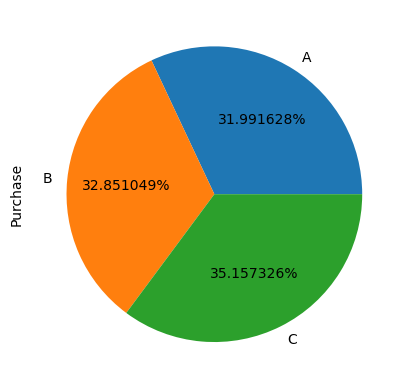

In [67]:
df.groupby("City_Category")["Purchase"].mean().plot(kind="pie",autopct="%2f%%")

In [68]:
# all cities have almost same purchasing power

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

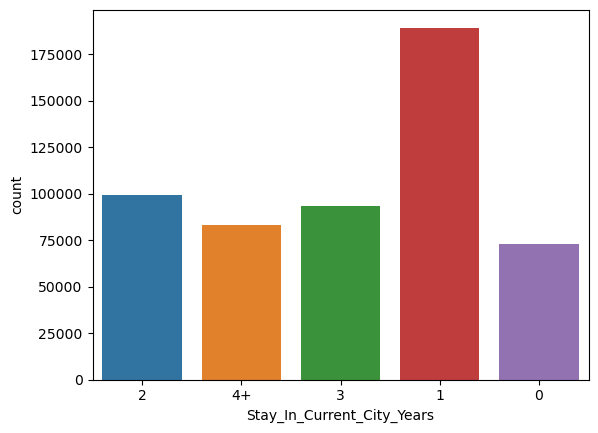

In [69]:
sns.countplot(data=df,x="Stay_In_Current_City_Years")

In [70]:
# most of buyers are ppl who have lived one yr in the city are 

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

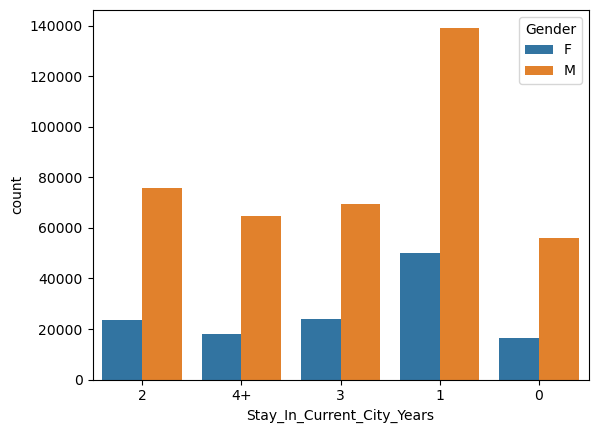

In [71]:
sns.countplot(data=df,x="Stay_In_Current_City_Years",hue="Gender")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

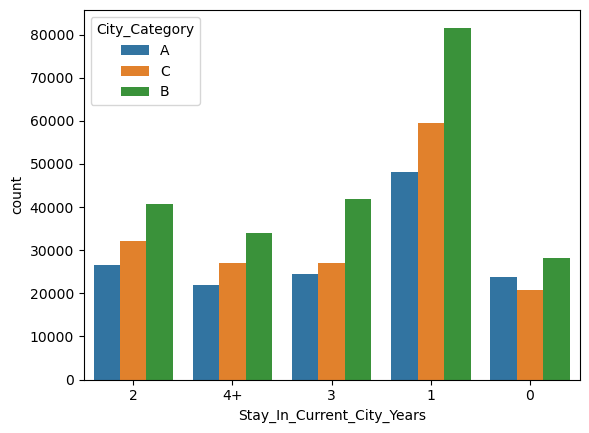

In [72]:
sns.countplot(data=df,x="Stay_In_Current_City_Years",hue="City_Category")

<Axes: ylabel='count'>

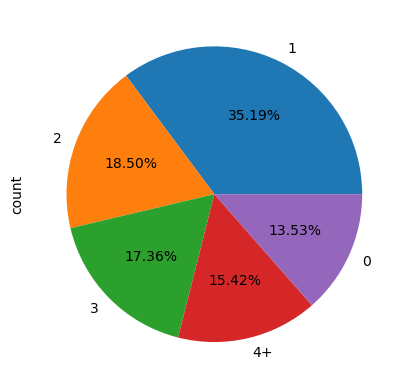

In [73]:
df["Stay_In_Current_City_Years"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [74]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum()

Stay_In_Current_City_Years
0      672505429
1     1763243917
2      934676626
3      872531130
4+     774711276
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

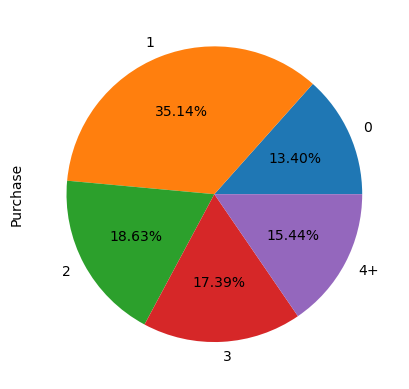

In [75]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind="pie",autopct="%.2f%%")

In [76]:
#most purchase amount also from people staying 1 yr

<Axes: ylabel='Purchase'>

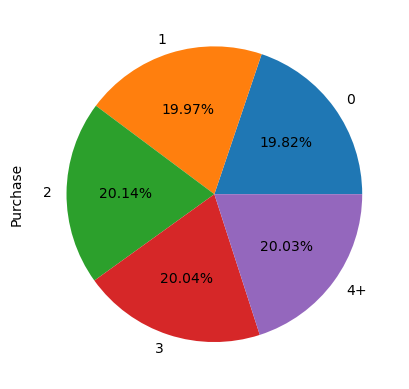

In [77]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="pie",autopct="%.2f%%")

In [78]:
#Almost the years they stay has no relation with their purchasing power

<Axes: xlabel='Occupation', ylabel='count'>

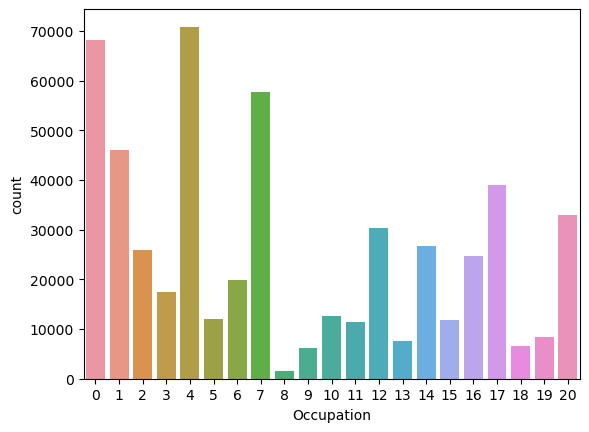

In [79]:
sns.countplot(data=df,x="Occupation")

<Axes: ylabel='count'>

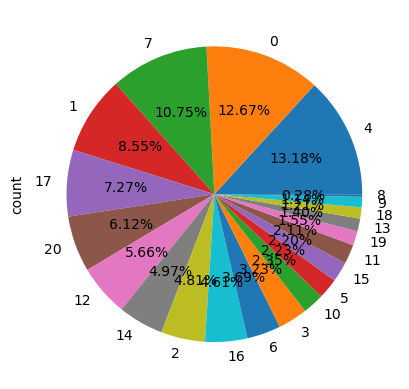

In [80]:
df["Occupation"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [81]:
# most buyers occupation is 4,0,7,1,17

In [82]:
df.groupby("Occupation")["Purchase"].sum()

Occupation
0     625814811
1     414552829
2     233275393
3     160428450
4     657530393
5     112525355
6     185065697
7     549282744
8      14594599
9      53619309
10    114273954
11    105437359
12    300672105
13     71135744
14    255594745
15    116540026
16    234442330
17    387240355
18     60249706
19     73115489
20    292276985
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

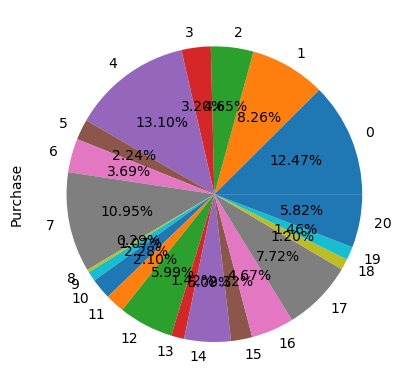

In [83]:
df.groupby("Occupation")["Purchase"].sum().plot(kind="pie",autopct="%.2f%%")

In [84]:
# pople with occupation 4 has most purchase amount

<Axes: ylabel='Purchase'>

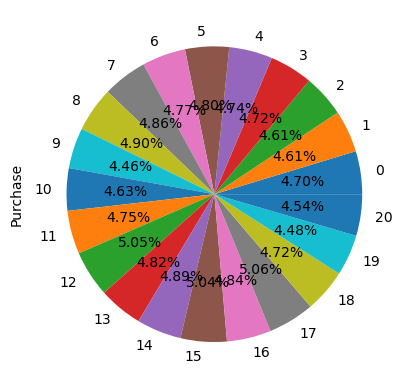

In [85]:
df.groupby("Occupation")["Purchase"].mean().plot(kind="pie",autopct="%.2f%%")

In [86]:
df.groupby("Occupation")["Purchase"].mean()

Occupation
0     9186.946726
1     9017.703095
2     9025.938982
3     9238.077277
4     9279.026742
5     9388.848978
6     9336.378620
7     9502.175276
8     9576.508530
9     8714.335934
10    9052.836410
11    9299.467190
12    9883.052460
13    9424.449391
14    9568.536426
15    9866.239925
16    9457.133118
17    9906.378997
18    9233.671418
19    8754.249162
20    8881.099514
Name: Purchase, dtype: float64

In [87]:
# even though most of the purchase and amount from 4 the most purchasing power is of 17 occupation

<Axes: xlabel='Occupation', ylabel='count'>

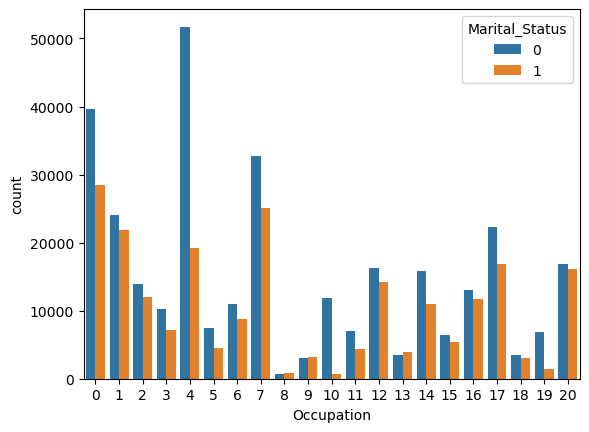

In [88]:
sns.countplot(data=df,x="Occupation",hue="Marital_Status")

<Axes: xlabel='Occupation', ylabel='count'>

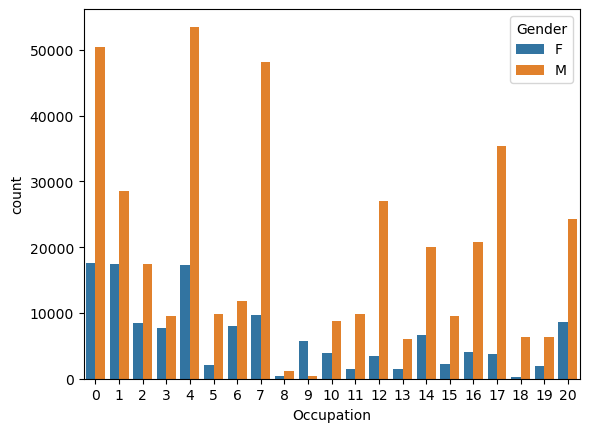

In [89]:
sns.countplot(data=df,x="Occupation",hue="Gender")

<Axes: xlabel='Occupation'>

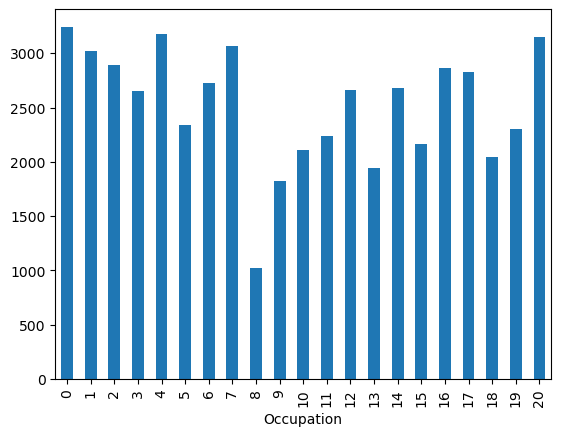

In [96]:
df.groupby("Occupation")["Product_ID"].nunique().plot(kind="bar")

<Axes: xlabel='Product_ID'>

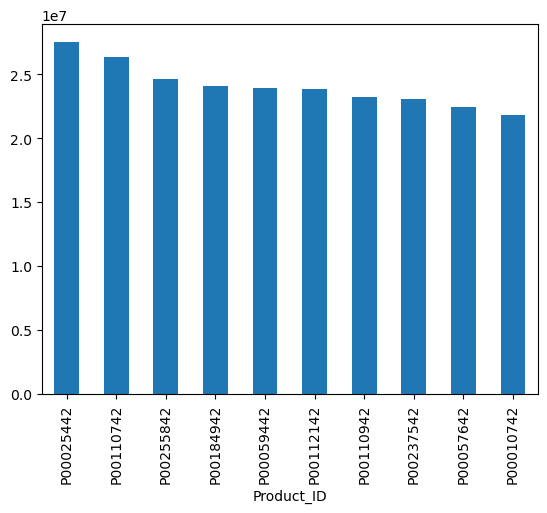

In [101]:
df.groupby("Product_ID")["Purchase"].sum().nlargest(10).plot(kind="bar")